<a href="https://colab.research.google.com/github/JonNmonteiro/nomes/blob/master/TratamentoNomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Carregar os dados dos Arquivos de nomes do IBGE e explorar o data set


In [0]:
import pandas as pd 
data = pd.read_csv('https://raw.githubusercontent.com/JonNmonteiro/nomes/master/nomes-censos-ibge.csv', sep=',', encoding='utf-8', error_bad_lines=False)
data.head()

,Nome,ate1930,ate1940,ate1950,ate1960,ate1970,ate1980,ate1990,ate2000,ate2010
0,MARIA,336477.0,749053.0,1487042.0,2476482.0,2495491.0,1616019.0,917968.0,544296.0,1111301.0
1,ANA,33395.0,56160.0,101259.0,183941.0,292835.0,421531.0,529266.0,536302.0,935169.0
2,JOAO,60155.0,141772.0,256001.0,396438.0,429148.0,279975.0,273960.0,352552.0,794118.0
3,GABRIEL,1267.0,2744.0,4256.0,6095.0,6559.0,9103.0,46996.0,271405.0,584024.0
4,LUCAS,388.0,937.0,1593.0,2787.0,4425.0,9954.0,84484.0,517436.0,505306.0


In [0]:
data.tail()

,Nome,ate1930,ate1940,ate1950,ate1960,ate1970,ate1980,ate1990,ate2000,ate2010
64454,FUJIE,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64455,GIUSEPINA,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64456,NELLO,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64457,SYLLA,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,VENOZINA,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
NomesValidos = data['Nome']
nome_10000 = data['ate2010'] >= 10000
NovaData = data[nome_10000]
#NovaData['Nome', 'ate2010']
NovaData = NovaData[['Nome', 'ate2010']]




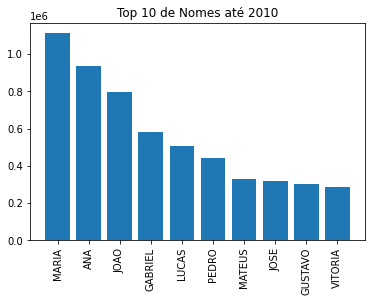

In [0]:
import matplotlib.pyplot as plt
NovaData = NovaData.nlargest(10, 'ate2010')
#plt.plot(NovaData['Nome'], NovaData['ate2010'])
plt.title('Top 10 de Nomes até 2010')
plt.bar(NovaData['Nome'], NovaData['ate2010'])
plt.xticks(NovaData['Nome'], rotation='vertical')
plt.show()
#NovaData.nlargest(10, 'ate2010').plot(kind='bar', )

In [183]:
Nomes_Validos = NomesValidos.to_frame()


def calculo():
  return 1
Nomes_Validos['valido'] =Nomes_Validos['valido'] =calculo()
Nomes_Validos.head()

Nomes_Validos.reset_index(drop=True, inplace=True)
#Nomes_Validos['valido'] = Nomes_Validos['Nome'].map(calculo())
Nomes_Validos.head()
#Nomes_Validos.count()

Nome      64459
valido    64460
dtype: int64

Analise dos nomes validos com sucesseo, carregar os nomes invalidos


In [223]:
nomesInvalidos = pd.read_csv('https://raw.githubusercontent.com/JonNmonteiro/nomes/master/nomesInvalidos.csv', sep=',', encoding='utf-8', error_bad_lines=False)
nomesInvalidos.head()
nomesInvalidos['Nome'] = nomesInvalidos['Nome'].str.strip()
nomesInvalidos =  nomesInvalidos.rename( columns = { "tipo" : "valido"})
nomesInvalidos.head()


,Nome,valido
0,EU DA SILVA,0
1,PRISCILASDUTRAHOTMAILOM,0
2,ANDERSONLASPERGHOTMAILCOM,0
3,TESTEEEEESS,0
4,TESTEEEEE,0


Importamos as duas bases de dados - agora reunir as duas. em um unico dataset.
E preparar um algoritmo de classificação


In [224]:
frames = [Nomes_Validos, nomesInvalidos]
Nomes  = pd.concat(frames)
Nomes.head()

,Nome,valido
0,MARIA,1
1,ANA,1
2,JOAO,1
3,GABRIEL,1
4,LUCAS,1


ML 


In [231]:
def tip_features(word):
    return {'Len': (word)}
    
tip_features('TESTE')

labeled_names = ([(name, 'bom') for name in Nomes_Validos['Nome']] +
                 [(name, 'ruim') for name in nomesInvalidos['Nome']])

labeled_names[:10]

[('MARIA', 'bom'),
 ('ANA', 'bom'),
 ('JOAO', 'bom'),
 ('GABRIEL', 'bom'),
 ('LUCAS', 'bom'),
 ('PEDRO', 'bom'),
 ('MATEUS', 'bom'),
 ('JOSE', 'bom'),
 ('GUSTAVO', 'bom'),
 ('VITORIA', 'bom')]

In [0]:
from nltk.corpus import names
import nltk
import random
random.shuffle(labeled_names)

featuresets = [(len_features(n), valido) for (n, valido) in labeled_names]
train_set, test_set = featuresets[:4000], featuresets[4000:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
#classifier.classify(len_features'TESTE'))

Teste de predição

In [235]:
classifier.classify(tip_features('JONATHAN'))
#
#nltk.classify.accuracy(classifier, test_set)

'bom'

Algortimo Rodou  e esta funcionando - exportando o modelo treinado para uso na API que será construída com python e flask


In [0]:
#classifier.show_most_informative_features(5)
import pickle
save_classifier = open("naivebayes.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

Apos isso entrei nas pastas na lateral e baixei o arquivo salvo. Próximos passos codigo para importar o modelo e executar no python depois incluir o flask para fazer uma api.


# New Section

# New Section